In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('city_day.csv')  # Example dataset


In [3]:
# Display the first 5 rows of the dataset
print(df.head())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [4]:
# Display the first 5 rows of the dataset
print(df.tail())


                City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97  4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00  0.40  26.85  14.05   5.20   

         CO    SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
29526  0.47   8.55  23.30     2.24    12.07    0.73  41.0          Good  
29527  0.52  12.72  30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528  0.48   8.42  30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529  0.52   9.84  28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530  0.59   2.10  17.05      NaN      NaN     NaN  50.0          Good  


In [5]:
# Check for missing values
df.isnull().sum()

# Drop rows or columns with significant missing data
df.dropna(inplace=True)

# Feature selection
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]  # Example features
target = df['AQI']  # The target variable is AQI

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [7]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 423.6233120192308
R-squared: 0.9490850245107274


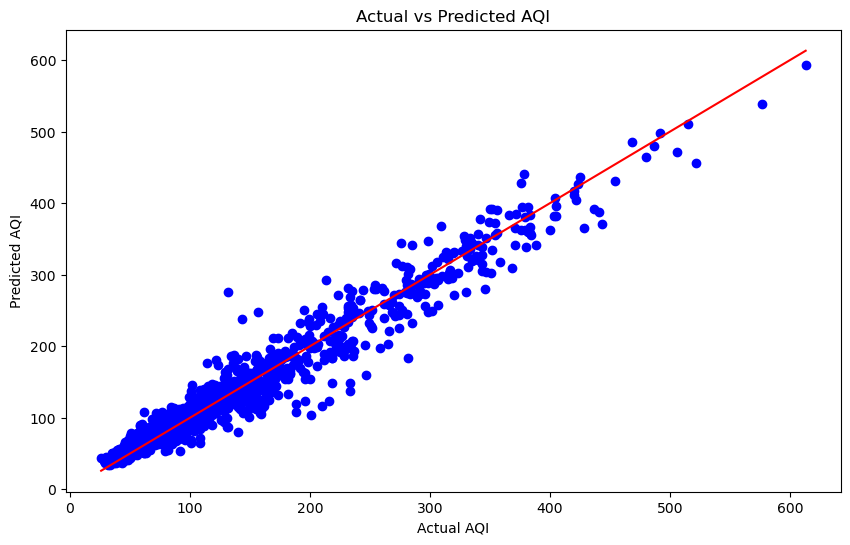

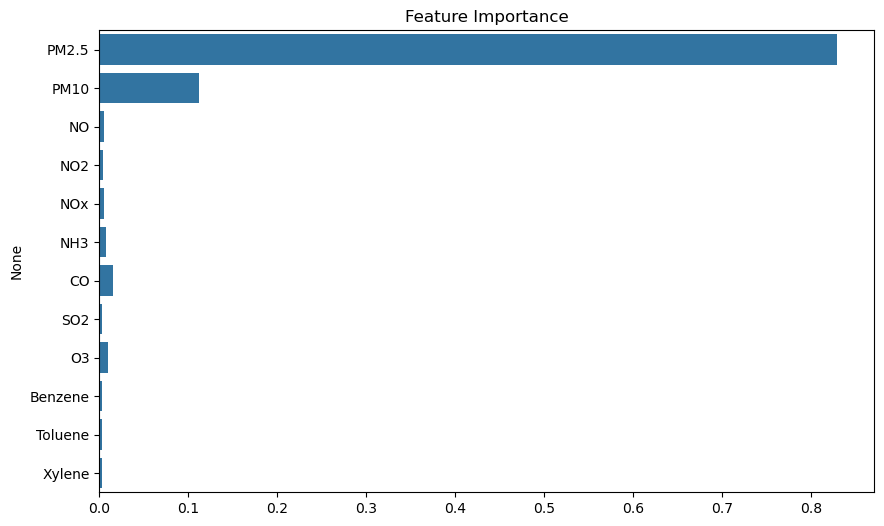

In [8]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

# Feature importance
importances = model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


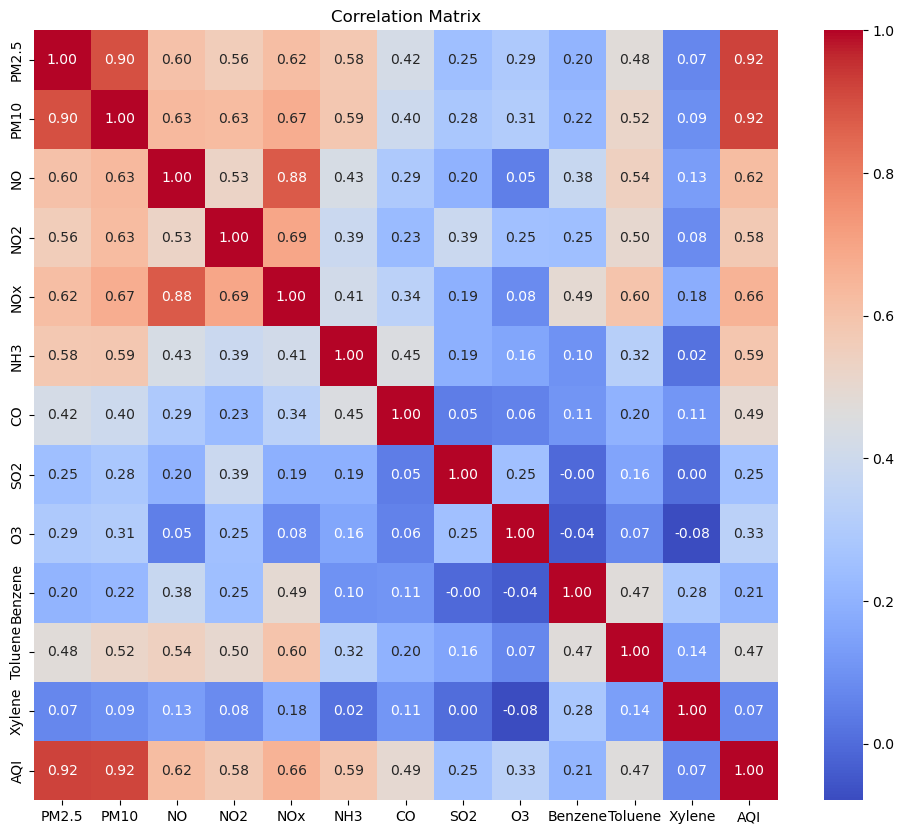

In [9]:
# Correlation Matrix Heatmap
correlation_matrix = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


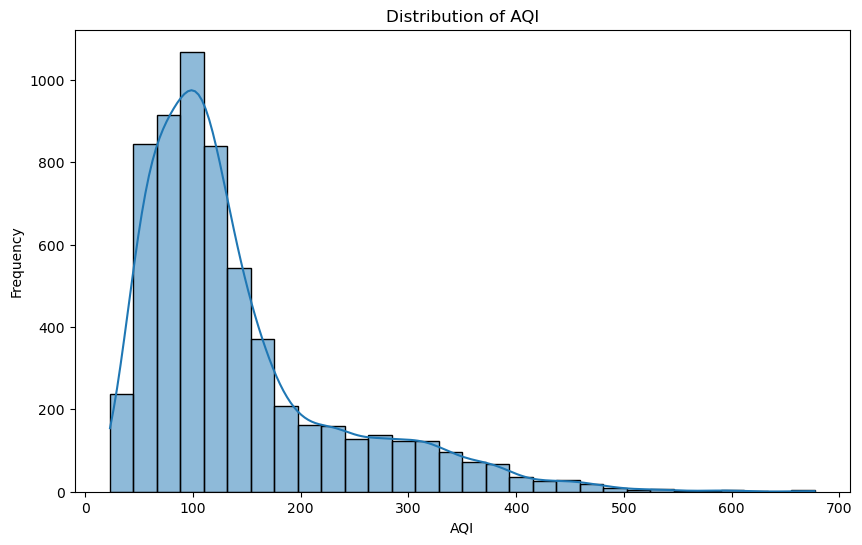

In [10]:
# Distribution of Target Variable (AQI)
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Distribution of AQI')
plt.show()


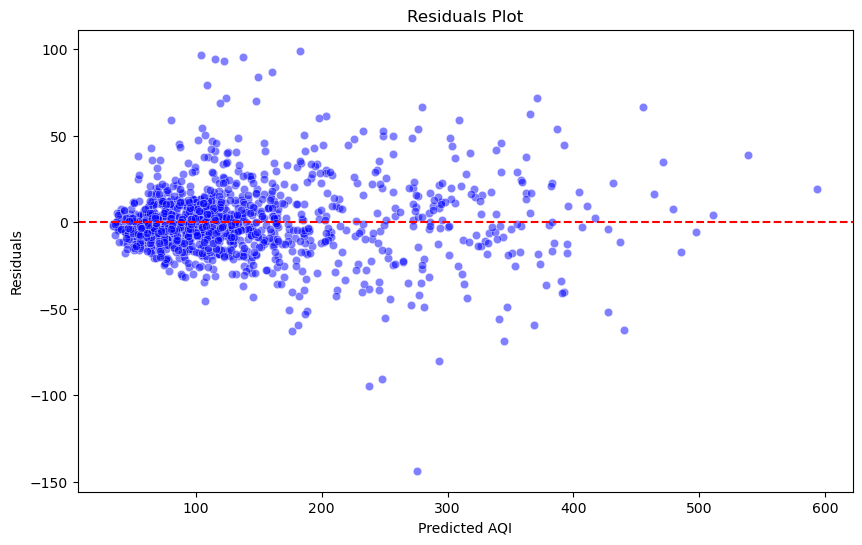

In [11]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
